### 국내 과일 시장과 소비 분석 <br>
1. 과일 1일 섭취량 변화 : 연도별 증감량, 여성/남성 소비 비율, 소득 수준별 소비 비율 <br>
   1-1. 2012년 ~ 2021년까지의 연령별 과일 섭취량 추이 변화 시각화 <br>
   1-2. 2012년 ~ 2021년까지의 소득 수준별 과일 섭취량 추이 변화와 물가상승률과의 상관관계 살펴보기 <br>
   1-3. 2021년 성별 과일 섭취량 시각화 <br> <br>

2. 과일 가격변화와 과일 섭취량의 상관 관계 분석 : https://www.kamis.or.kr/customer/mypage/my_openapi/my_openapi.do <br>
   2-1. 과일별 평균 가격 변화 시각화
   2-2. 평균 가격과 섭취량의 상관 관계 분석
   2-3. 지역별 평균 가격 변화 시각화 
   2-4. 지역별 평균 가격 예측 <br> <br>

3. 과일 재배지 분포 시각화 <br>
   2-1. 과일 재배지 분포 : plotly map <br> <br>

4. 과일별 판매량
   3-1 크롤링 - 재배지에서 정재한 품목 명으로 추출하여 판매량 수 크롤링 <br> <br>
   3-2 품목별 판매량 시각화

5. 판매량에 따른 과일 성분에 따른 맛 선호도 분류 <br>
   5-1. 산도(비타민C, 구연산), 당도(당류), 수분량으로 선호도 분류 <br>
   5-2. 판매량으로 어떤 맛의 선호도가 높은지 분석 <br> <br>
   
6. 블로그 데이터 클라우드로 보는 소비자 트렌드 시각화 <br>
   6-1. 네이버 블로그 API로 자료 수집
   6-2. 데이터 클라우드 생성

### [ 과일 1일 섭취량 데이터 설명 ]
파일명 : 식품섭취.xlsx <br>
시트명 : 11.과일류
과일 섭취량 : 과일류 식품의 섭취 중량에 대한 합/분석대상자 수 <br>
소득수준 : 월가구균등화소득(월가구소득/√가구원수)을 성별·연령별(5세단위) 오분위로 분류

### 1-1. 2012년 ~ 2021년까지의 연령별 과일 섭취량 추이 변화

In [352]:
import pandas as pd

# 파일 경로와 시트명 설정
file_path = '식품섭취.xlsx' # 파일경로
sheet_name = '11.과일류' # 시트명

# Excel 파일 읽기 : 연령별 데이터
age_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=15,
                   nrows=8)

# 데이터프레임 확인
print(age_df.head())

        0   1     3      4       5     6      7       8     9      10  ...  \
2                                                                      ...   
 1-9   NaN NaN  1459  176.9   (9.0)  1506  187.1   (8.0)  1199   91.8  ...   
 10-18 NaN NaN  1440  196.9  (10.3)  1370  187.5   (9.9)  1205   83.9  ...   
 19-29 NaN NaN  1550  220.0  (11.3)  1370  203.7  (11.6)  1045   90.3  ...   
 30-39 NaN NaN  1866  228.8   (9.8)  1805  227.0  (10.4)  1466  110.8  ...   
 40-49 NaN NaN  1461  202.9   (8.5)  1601  222.4  (12.4)  1559   88.7  ...   

            47    48     49      50   51     52      53   54     55      56  
2                                                                            
 1-9     (8.1)   736  139.2   (9.6)  535  122.3   (9.3)  483  129.4   (8.8)  
 10-18   (8.8)   639   96.1   (7.5)  469   94.8  (16.1)  484  102.1  (10.5)  
 19-29   (7.0)   669   86.8   (8.2)  624   66.7   (7.1)  584   64.3   (5.8)  
 30-39  (11.5)   855  110.1   (8.3)  633  104.4   (8.5)  549   

In [317]:
# 2012~2021 연령별 섭취 데이터만 수집
df=age_df.drop([0,1], axis=1)
df = df.iloc[:,24::3]
print(df.head())

         27    30   33   36    39    42    45    48   51   54
2                                                            
 1-9    825   914  822  641   934   812   756   736  535  483
 10-18  817   887  657  681   676   634   605   639  469  484
 19-29  582   670  567  661   623   653   682   669  624  584
 30-39  937   963  908  718   966   845   862   855  633  549
 40-49  900  1060  899  904  1011  1028  1050  1036  807  810


In [318]:
df.columns=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
print(df.head())

        2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
2                                                                 
 1-9     825   914   822   641   934   812   756   736   535   483
 10-18   817   887   657   681   676   634   605   639   469   484
 19-29   582   670   567   661   623   653   682   669   624   584
 30-39   937   963   908   718   966   845   862   855   633   549
 40-49   900  1060   899   904  1011  1028  1050  1036   807   810


[Text(0.5, 0, '년도'),
 Text(0, 0.5, '섭취량'),
 Text(0.5, 1.0, '연도에 따른 연령별 과일섭취량 추이')]

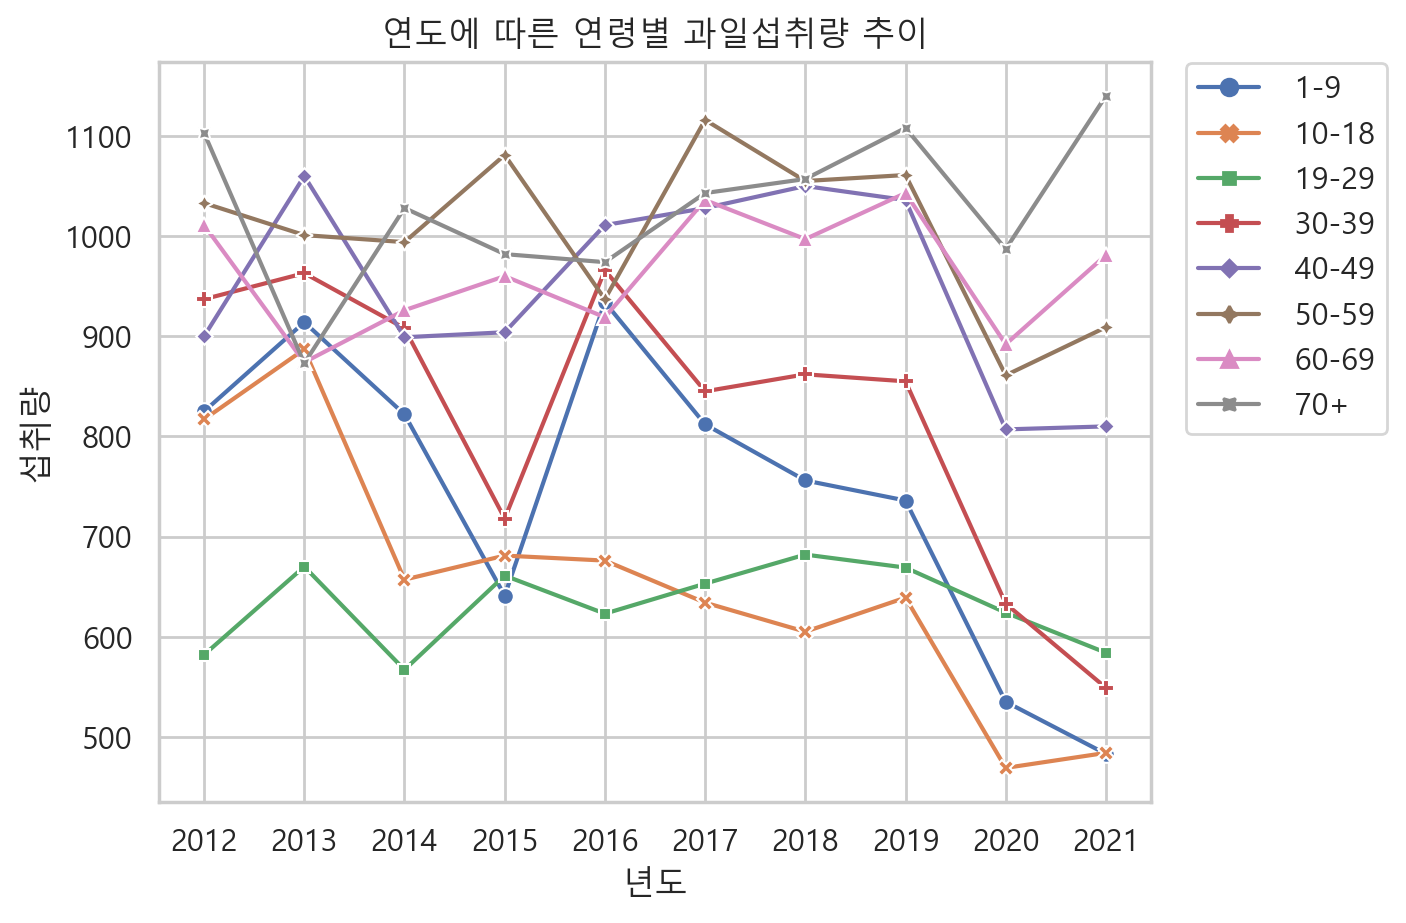

In [319]:
import seaborn as sns
df = df.T
# 그래프 그리기
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=1)
ax = sns.lineplot(data=df, markers=True, dashes=False)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))  # 범례 위치 조정
ax.set(xlabel='년도', ylabel='섭취량',title='연도에 따른 연령별 과일섭취량 추이')

### 1-2. 2012년 ~ 2021년까지의 소득 수준별 과일 섭취량 추이 변화

In [353]:
# Excel 파일 읽기 : 소득수준별 데이터
income_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=49,
                   nrows=5)

# 데이터프레임 확인
print(income_df.head())

     0   1     3      4       5     6      7       8     9      10  ...  \
2                                                                   ...   
 하  NaN NaN  2037  145.9   (8.6)  1689  174.6   (9.7)  1870   59.4  ...   
 중하 NaN NaN  2009  179.1   (7.7)  1896  196.5  (10.4)  1790   77.8  ...   
 중  NaN NaN  2172  197.5   (8.3)  1898  220.3  (11.5)  1732   91.2  ...   
 중상 NaN NaN  2114  212.6  (10.1)  1778  213.6  (11.3)  1736   98.2  ...   
 상  NaN NaN  2068  236.5  (10.4)  2130  234.1  (10.7)  1715  116.7  ...   

        47    48     49      50    51     52      53    54     55     56  
2                                                                         
 하   (6.3)  1422  112.6   (6.3)  1165   98.6   (9.1)  1182  104.5  (8.4)  
 중하  (5.8)  1403  127.0   (6.9)  1161  116.2   (7.9)  1200   97.0  (5.9)  
 중   (7.7)  1454  123.2   (6.7)  1166  127.6   (9.5)  1206  120.3  (6.8)  
 중상  (8.1)  1436  152.7  (14.8)  1116  124.9   (8.7)  1161  119.8  (8.8)  
 상   (7.4)  1405  160.1 

In [354]:
# 2012~2021 소득수준별 섭취 데이터만 수집
df2=income_df.drop([0,1], axis=1)
df2 = df2.iloc[:,24::3]
print(df2.head())

index_name = ['하','중하','중','중상','상'] #공백제거
df2.index=index_name

       27    30    33    36    39    42    45    48    51    54
2                                                              
 하   1396  1410  1358  1320  1412  1435  1411  1422  1165  1182
 중하  1441  1450  1348  1333  1383  1453  1415  1403  1161  1200
 중   1403  1468  1340  1296  1395  1437  1401  1454  1166  1206
 중상  1435  1446  1358  1318  1405  1453  1413  1436  1116  1161
 상   1407  1415  1365  1323  1418  1375  1411  1405  1182  1163


In [355]:
df2.columns=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
print(df2.head())

    2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
하   1396  1410  1358  1320  1412  1435  1411  1422  1165  1182
중하  1441  1450  1348  1333  1383  1453  1415  1403  1161  1200
중   1403  1468  1340  1296  1395  1437  1401  1454  1166  1206
중상  1435  1446  1358  1318  1405  1453  1413  1436  1116  1161
상   1407  1415  1365  1323  1418  1375  1411  1405  1182  1163


[Text(0.5, 0, '년도'),
 Text(0, 0.5, '섭취량'),
 Text(0.5, 1.0, '연도에 따른 소득수준별 과일섭취량 추이')]

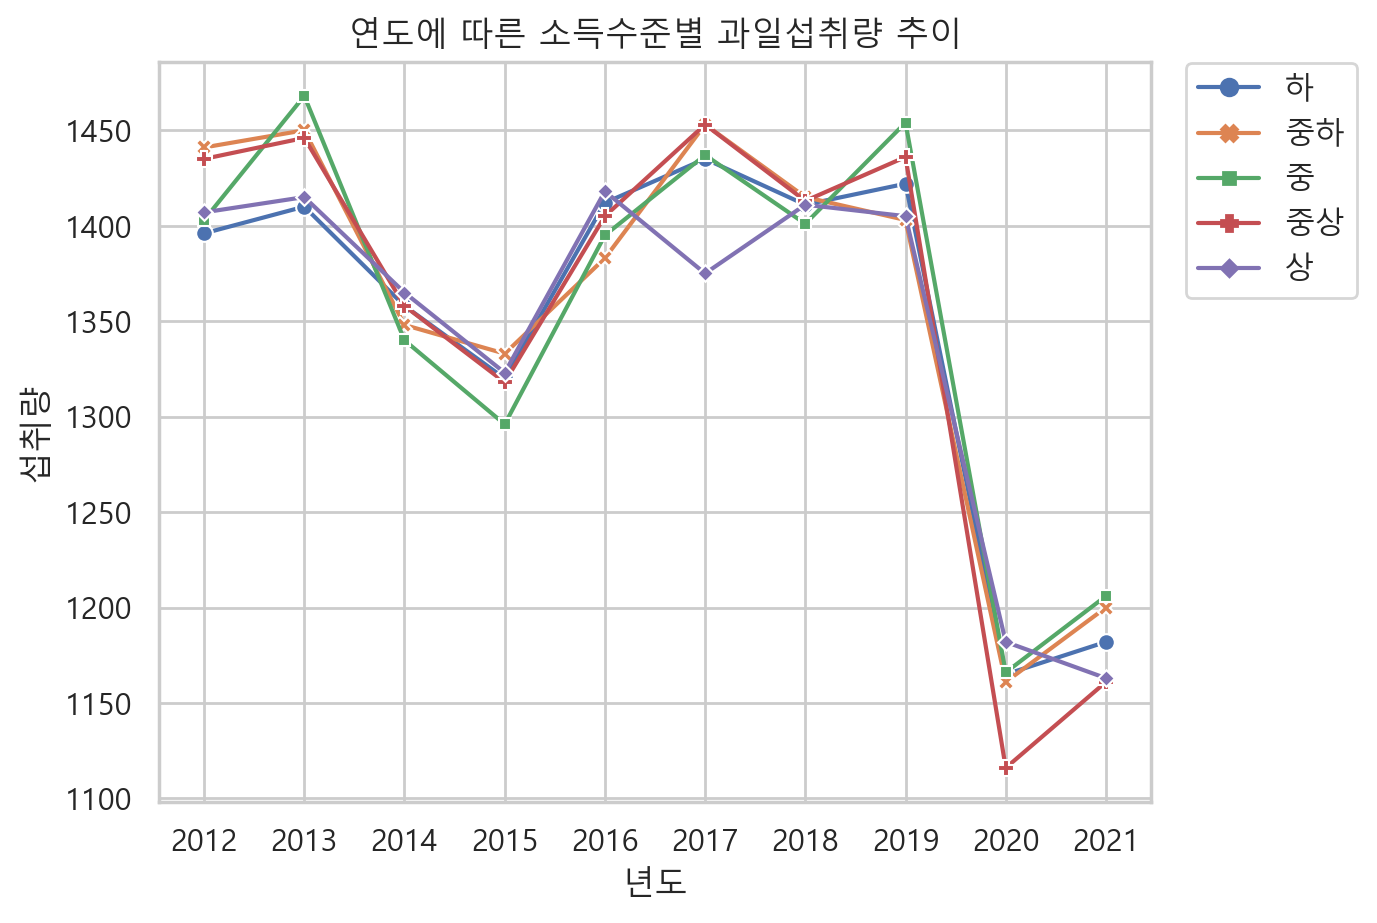

In [356]:
df2 = df2.T
# 그래프 그리기
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=1)
ax = sns.lineplot(data=df2, markers=True, dashes=False)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))  # 범례 위치 조정
ax.set(xlabel='년도', ylabel='섭취량',title='연도에 따른 소득수준별 과일섭취량 추이')

In [360]:
import warnings
warnings.filterwarnings("ignore")

# Excel 파일 읽기 : 소득수준별 데이터
file_path = '물가상승률.xlsx'
price_df = pd.read_excel(file_path,
                   header=2,
                   index_col = 0,
                   skipfooter=3)

price_df = price_df.loc[['식료품/비주류음료']]

# 데이터프레임 확인
print(price_df.head())

           2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
식료품/비주류음료   4.0   0.9   0.3   1.6   2.3   3.4   2.8   0.0   4.4   5.9


In [361]:
price_df = price_df.rename(columns={'식료품/비주류음료': '식품 물가상승률'})
print(price_df.head())

           2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
식료품/비주류음료   4.0   0.9   0.3   1.6   2.3   3.4   2.8   0.0   4.4   5.9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


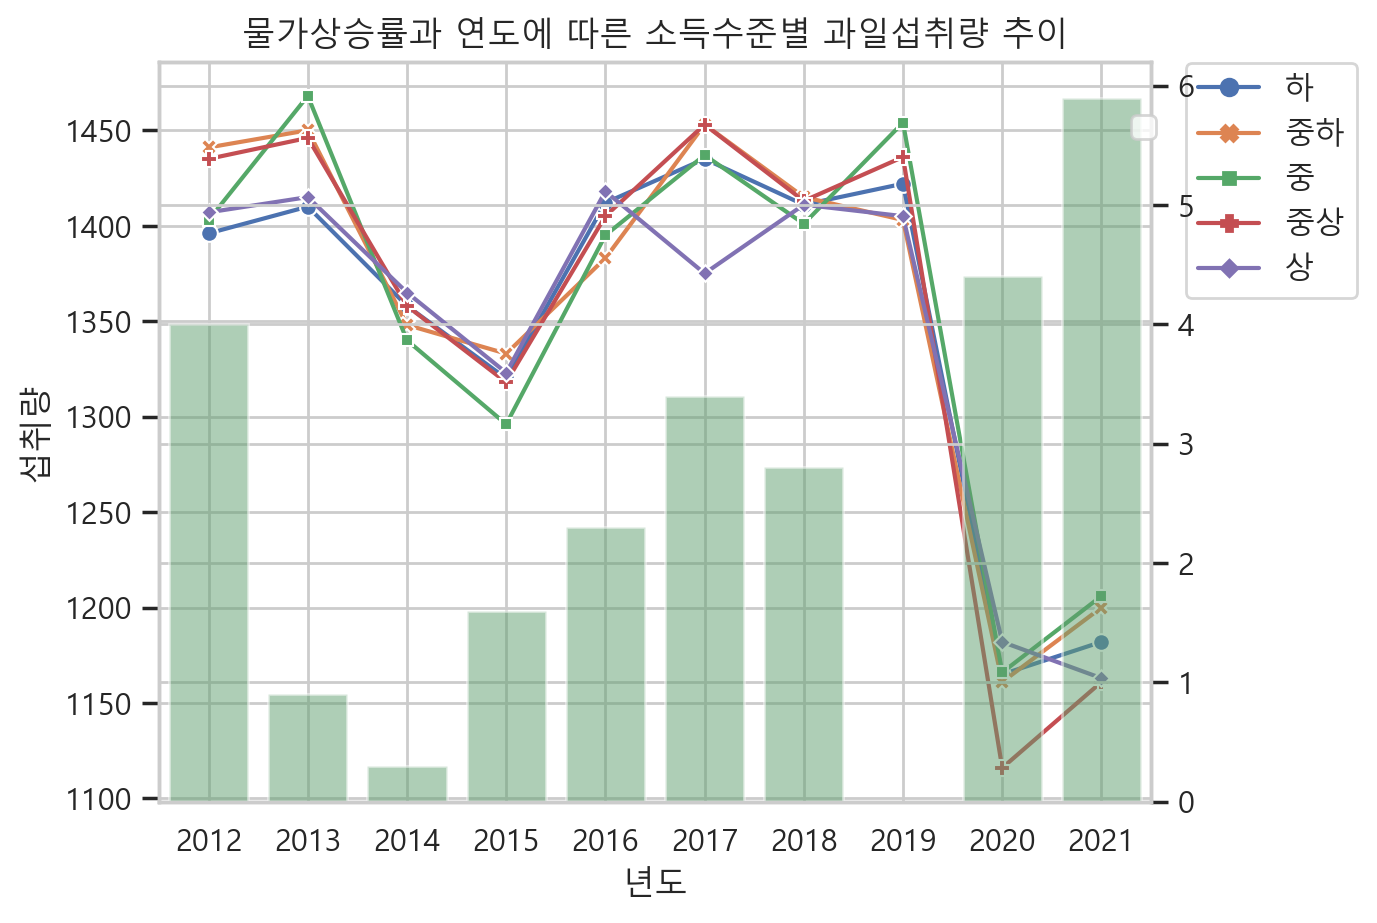

In [363]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df3 = price_df

# 그래프 설정
sns.set(style='whitegrid', font='Malgun Gothic', font_scale=1)
ax = sns.lineplot(data=df2, markers=True, dashes=False)

# bar 차트 추가
ax2 = ax.twinx()
ax2 = sns.barplot(data=df3, alpha=0.5, color='g', ax=ax2)

# 범례 위치 조정
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))
ax2.legend(loc='upper right', bbox_to_anchor=(1.02, 0.95))

# 라벨 및 타이틀 설정
ax.set(xlabel='년도', ylabel='섭취량', title='물가상승률과 연도에 따른 소득수준별 과일섭취량 추이')

# 그래프 보여주기
plt.show()

### 1-2. 2021년 성별 과일 섭취량 비교

In [178]:
# Excel 파일 읽기 : 성별 데이터
male_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=62,
                   nrows=8)

female_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=109,
                   nrows=8)

# 데이터프레임 확인
print(male_df.head())
print(female_df.head())

        0   1    3      4       5    6      7       8    9     10  ...  \
2                                                                  ...   
 1-9   NaN NaN  766  166.2  (10.6)  811  199.3   (9.5)  615  90.3  ...   
 10-18 NaN NaN  738  199.0  (13.7)  696  180.1  (11.4)  634  76.8  ...   
 19-29 NaN NaN  707  188.3  (13.5)  615  155.2  (12.2)  451  73.2  ...   
 30-39 NaN NaN  922  197.0  (12.1)  857  182.4  (11.8)  659  99.0  ...   
 40-49 NaN NaN  720  161.6  (10.6)  784  167.9  (15.1)  731  73.3  ...   

            47   48     49      50   51     52       53   54     55      56  
2                                                                            
 1-9    (10.2)  373  145.0  (11.6)  273  133.6   (11.2)  240  132.5  (13.0)  
 10-18  (11.6)  334   84.4   (9.9)  255  100.1  (26.7)*  259   98.2  (13.4)  
 19-29  (11.0)  323   92.1  (13.6)  292   63.1    (9.0)  279   60.7   (8.9)  
 30-39  (11.9)  384   91.5  (11.6)  270   93.7   (12.5)  232   71.8  (10.7)  
 40-49  (10.6

In [191]:
# 2012~2021 남성 섭취 데이터만 수집
male_data=male_df.drop([0,1], axis=1)
male_data=male_data.iloc[:,24::3]

# 2021 남성 섭취 데이터만 수집
male_data = male_data.iloc[:,9]
print(male_data.head())

2
 1-9      240
 10-18    259
 19-29    279
 30-39    232
 40-49    351
Name: 54, dtype: int64


In [192]:
# 2012~2021 여성 섭취 데이터만 수집
female_data=female_df.drop([0,1], axis=1)
female_data=female_data.iloc[:,24::3]

# 2021 여성 섭취 데이터만 수집
female_data = female_data.iloc[:,9]
print(female_data.head())

2
 1-9      243
 10-18    225
 19-29    305
 30-39    317
 40-49    459
Name: 54, dtype: int64


In [199]:
total = {'여성':female_data, '남성':male_data}
total_data = pd.DataFrame(total)
print(total_data)

         여성   남성
2               
 1-9    243  240
 10-18  225  259
 19-29  305  279
 30-39  317  232
 40-49  459  351
 50-59  539  370
 60-69  567  414
 70+    646  494


In [201]:
total_data = total_data.T

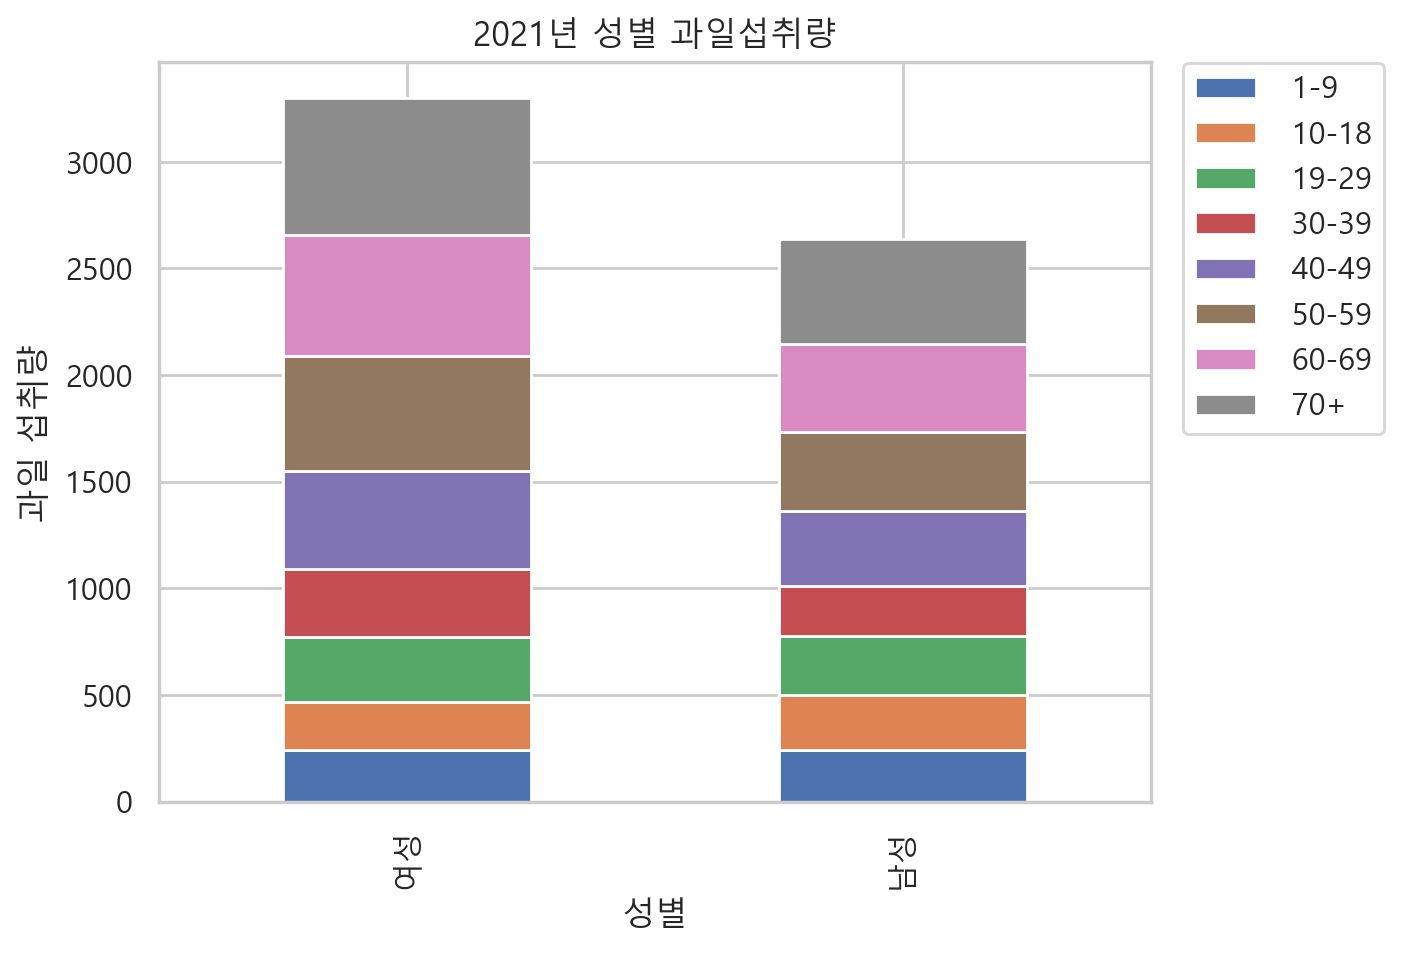

In [210]:
import matplotlib.pyplot as plt

total_data.plot(kind='bar', stacked=True)
plt.title('2021년 성별 과일섭취량')
plt.xlabel('성별')
plt.ylabel('과일 섭취량')

# 범례 위치와 레이아웃 조정
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.show()